### Importing modules

In [216]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import KFold

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pd.set_option('display.max_columns', 50)

### Loading Data

In [2]:
battles = pd.read_csv('battles.csv')
char_deaths = pd.read_csv('character-deaths.csv')
char_pred = pd.read_csv('character-predictions.csv')

In [3]:
battles.head(3)

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN,win,ambush,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN


In [4]:
char_pred.head(3)

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0,0,0.267559,1


In [5]:
char_deaths.head(3)

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1


## Data Exploration

Since our task is to predict characters death. We will focus on Character dataset

In [6]:
char_pred.head(3)

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0,0,0.267559,1


In [7]:
# viewing age properties
char_pred['age'].describe()

count       433.000000
mean      -1293.563510
std       19564.340993
min     -298001.000000
25%          18.000000
50%          27.000000
75%          50.000000
max         100.000000
Name: age, dtype: float64

There are negative value for date of birth. Negative mean for age.
Let's investigate that.

Research was made and according to [Fandom.com](https://gameofthrones.fandom.com/wiki/Doreah) Doreah is 25 years old.

According to [Fanthom.com](https://gameofthrones.fandom.com/wiki/Rhaego) Rhaego was never born.

### Feature Engineering


In [87]:
char = char_pred.copy()

#### Cleaning Feature

In [88]:
# Replacing the age
char_pred.loc[1684, 'age'] = 25.0
char_pred.loc[1868, 'age'] = 0.0

Removing NaNs

In [89]:
miss = char.isna().sum()
miss[miss > 0]

title            1008
culture          1269
dateOfBirth      1513
DateoFdeath      1502
mother           1925
father           1920
heir             1923
house             427
spouse           1670
isAliveMother    1925
isAliveFather    1920
isAliveHeir      1923
isAliveSpouse    1670
age              1513
dtype: int64

We have 14 columns with NaN vales. We will replace that of age with the average age value.

Replace date of birth and date of death with the median value.

Replace other categorical variable with unknown

Replace other numerical variable with -1

In [90]:
# Fill missing age with average age
char["age"].fillna(round(char["age"].mean()), inplace=True)

In [91]:
char['dateOfBirth'].fillna(char['dateOfBirth'].median(), inplace=True)
char['DateoFdeath'].fillna(char['DateoFdeath'].median(), inplace=True)

In [92]:
cat = ['title', 'culture', 'mother', 'father', 'heir', 'house', 'spouse']
for col in cat:
    char[col].fillna('unknown', inplace=True)

In [93]:
char.fillna(-1, inplace=True)

In [94]:
char['culture'].unique()

array(['unknown', 'Rivermen', 'Dornish', 'Valyrian', 'Ironborn',
       'Free Folk', 'Northmen', 'Summer Isles', 'Braavosi', 'Dothraki',
       'Ghiscari', 'Vale mountain clans', 'Reach', 'Tyroshi', 'Lhazarene',
       'Free folk', 'Ironmen', 'Qartheen', 'Lysene', 'westermen',
       'Westerman', 'Qarth', 'Lyseni', 'northmen', 'Qohor', 'Westeros',
       'Norvoshi', 'First Men', 'Meereenese', 'Andal', 'Astapori',
       'Westermen', 'ironborn', 'Ghiscaricari', 'Braavos', 'Stormlands',
       'Valemen', 'Myrish', 'Lhazareen', 'Dornishmen', 'Sistermen',
       'Northern mountain clans', 'Andals', 'Vale', 'Crannogmen',
       'Wildling', 'Dorne', 'Pentoshi', 'free folk', 'Summer Islander',
       'Westerlands', 'Summer Islands', 'Asshai', 'Riverlands', 'Naathi',
       'Rhoynar', 'Meereen', 'Norvos', 'Stormlander', 'Wildlings',
       'Astapor', 'Reachmen', "Asshai'i", 'Ibbenese', 'The Reach'],
      dtype=object)

Some culture are spelt wrongly thus making duplicate. E.g. 'Westermen', 'Westerman' and 'westermen' are all the same.

In [95]:
# From  Shail Daliwala's kernel on Kaggle
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

def get_cult(value):
    value = value.lower()
    v = [k for (k, v) in cult.items() if value in v]
    return v[0] if len(v) > 0 else value.title()

char.loc[:, "culture"] = [get_cult(x) for x in char.culture.fillna("")]


Link to other data

In [96]:
# Names of all Attackers
all_attackers = set(battles.attacker_1).union(set(battles.attacker_2))\
.union(set(battles.attacker_3)).union(set(battles.attacker_4))
# Names of all Defenders
all_defenders = set(battles.defender_1).union(set(battles.defender_2))

# Unique attackers and defenders combined
all_warlead = all_attackers.union(all_defenders)
all_warlead = list(all_warlead)
all_warlead.remove(np.nan)

renam_warlead = []
for x in all_warlead:
    house = 'House ' + x
    renam_warlead.append(house)
    
# All attacking commanders
all = []
for i in battles['attacker_commander'].dropna().values:
    splitted = i.split(', ')
    all +=splitted
    
all_att_commanders = set(all)

# All defending commanders
all = []
for i in battles['defender_commander'].dropna().values:
    splitted = i.split(', ')
    all +=splitted
    
all_def_commanders = set(all)

# All commanders 
all_commanders = all_att_commanders.union(all_def_commanders)
# characters who swore allegiance in character death data
char_with_allgnc = char_deaths[char_deaths['Allegiances'] != 'None']

# Extracting the above character from all character data
all_char_with_allgnc = char_pred[char_pred['name'].isin(char_with_allgnc['Name'])]

# house of character with allegiance to another house (house in character dead allegiance column)
hus_char_with_allegnc = all_char_with_allgnc['house']

# Extract unique house of allegiance from charater death data.
husOfAllgnc = list(set(char_deaths['Allegiances']))
husOfAllgnc.remove('None')

renam_husOfAllgnc = []
for x in husOfAllgnc:
    house = 'House ' + x
    renam_husOfAllgnc.append(house)


Creating Feature

In [97]:
char['isACommander'] = np.where(char['name'].isin(all_commanders), 1, 0)
char['inHouseOfWarLead'] = np.where(char['house'].isin(renam_warlead), 1, 0)
char['houseSworeAllegiance'] = np.where(char['house'].isin(hus_char_with_allegnc), 1, 0)
char['inHouseOfAllegnc'] = np.where(char['house'].isin(renam_husOfAllgnc), 1, 0)

In [98]:
char = char.drop(['S.No', 'actual', 'pred', 'alive', 'plod', 'name', 'dateOfBirth',
                  'DateoFdeath', 'house'], axis=1)

In [99]:
char

,title,male,culture,mother,father,heir,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive,isACommander,inHouseOfWarLead,houseSworeAllegiance,inHouseOfAllegnc
0,unknown,1,Unknown,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,unknown,0,0,0,0,0,1.0,0.0,0.0,-1.0,0,0,37.0,11,1,1,0.605351,0,0,0,0,0
1,Lord of the Crossing,1,Rivermen,unknown,unknown,unknown,Perra Royce,1,1,1,1,1,-1.0,-1.0,-1.0,1.0,1,1,97.0,1,1,1,0.896321,1,1,1,1,0
2,Ser,1,Unknown,unknown,unknown,unknown,unknown,0,0,0,1,0,-1.0,-1.0,-1.0,-1.0,0,1,37.0,0,0,0,0.267559,1,0,0,1,0
3,Queen,0,Unknown,unknown,unknown,unknown,Viserys I Targaryen,0,0,0,0,0,-1.0,-1.0,-1.0,0.0,1,1,23.0,0,0,0,0.183946,0,0,0,1,1
4,Greenstone,0,Dornish,unknown,unknown,unknown,Eldon Estermont,0,0,0,1,0,-1.0,-1.0,-1.0,1.0,1,1,29.0,0,0,0,0.043478,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,unknown,1,Westerosi,unknown,unknown,unknown,unknown,1,1,1,1,1,-1.0,-1.0,-1.0,-1.0,0,0,37.0,0,0,1,0.351171,0,0,1,1,1
1942,unknown,1,Unknown,unknown,unknown,unknown,unknown,0,1,0,1,1,-1.0,-1.0,-1.0,-1.0,0,0,37.0,0,0,0,0.096990,0,0,1,1,0
1943,unknown,1,Unknown,unknown,unknown,unknown,unknown,1,1,1,1,1,-1.0,-1.0,-1.0,-1.0,0,0,37.0,0,0,0,0.030100,1,0,0,0,0
1944,unknown,1,Unknown,unknown,unknown,unknown,unknown,0,0,1,1,1,-1.0,-1.0,-1.0,-1.0,0,0,37.0,0,0,0,0.130435,1,0,0,0,0


Feature Selection

In [265]:
new = char.copy()

In [266]:
# Heatmap of numerical feature in the training dataset
num_features = new.select_dtypes(['int', 'float'])
corr_mat = num_features.corr()['isAlive'].abs().sort_values()
corr_mat

book3                   0.006693
inHouseOfWarLead        0.029822
isAliveSpouse           0.031536
book5                   0.032846
isNoble                 0.042211
isMarried               0.050037
houseSworeAllegiance    0.052159
isACommander            0.057968
book2                   0.067200
inHouseOfAllegnc        0.113380
isAliveHeir             0.116365
isAliveFather           0.123615
age                     0.136891
isAliveMother           0.140661
male                    0.146982
book1                   0.147401
isPopular               0.153860
popularity              0.183223
numDeadRelations        0.192444
boolDeadRelations       0.193736
book4                   0.268975
isAlive                 1.000000
Name: isAlive, dtype: float64

<AxesSubplot:>

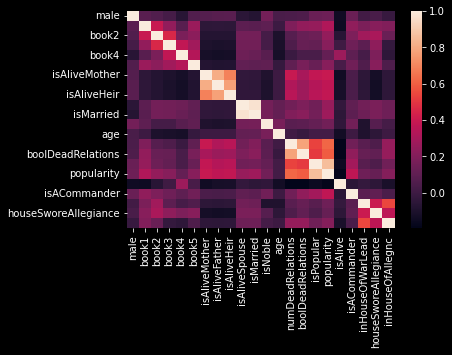

In [267]:
# Heatmap of numerical feature in the training dataset
num_features = new.select_dtypes(['int', 'float'])
corr_mat = num_features.corr()
sb.heatmap(data=corr_mat)

In [268]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x = num_features.drop(columns='isAlive')
vif = pd.DataFrame()
vif['features'] = x.columns

vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif.sort_values(by='VIF', ascending=False)

,features,VIF
7,isAliveFather,165.111250
6,isAliveMother,93.203589
8,isAliveHeir,77.020836
9,isAliveSpouse,28.026185
10,isMarried,15.455632
12,age,10.098704
16,popularity,7.642320
15,isPopular,4.347781
19,houseSworeAllegiance,3.579165
4,book4,3.242501


There are multicolinearity in the features. Let's drop some columns with multicolinearity

In [269]:
# Dropping columns with colinearity
new = new.drop(['isAliveFather', 'isAliveMother', 'isAliveSpouse'], axis=1)

In [270]:
# Selecting features with coefficient greater than 0.1
num_features = new.select_dtypes(['int', 'float'])
corr_mat = num_features.corr()['isAlive'].abs().sort_values()
corr_less = corr_mat[corr_mat < 0.1]
corr_less

book3                   0.006693
inHouseOfWarLead        0.029822
book5                   0.032846
isNoble                 0.042211
isMarried               0.050037
houseSworeAllegiance    0.052159
isACommander            0.057968
book2                   0.067200
Name: isAlive, dtype: float64

In [271]:
new = new.drop(corr_less.index, axis=1)

In [272]:
# List of categorical variable
nominal_features = ['title', 'culture', 'mother', 'father', 'heir', 'spouse']

# Counting unique values in each column
unique_count = new[nominal_features].apply(lambda x: len(x.value_counts())).sort_values()

In [273]:
# Arbitrary cutoff of 25 unique count
unique_count = unique_count[unique_count > 25].index
# Dropping 
new = new.drop(unique_count, axis=1)

In [274]:
# Converting the remaining text column to categorical type
txt_col = new.select_dtypes(include=['object'])
for col in txt_col:
    new[col] = new[col].astype('category')
    
# Creating dummy columns from txt columns and add back to dataframe
new = pd.concat([
    new, pd.get_dummies(new.select_dtypes(include=['category']))
], axis=1).drop(txt_col, axis=1)

In [275]:
data1 = new.copy()
train1 = data1[:1362]
test1 = data1[1362:]

features = train1.columns.tolist()
features.remove('isAlive')

lgr = LogisticRegression(random_state=42, max_iter = 1000)
lgr.fit(train1[features], train1['isAlive'])
predlgr = lgr.predict(test1[features])
lgr.score(train1[features], train1['isAlive'])

0.8127753303964758

In [276]:
lgr.score(test1[features], test1['isAlive'])

0.6952054794520548

In [277]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 

from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV, KFold, train_test_split 
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve 
from sklearn.metrics import confusion_matrix, classification_report

In [295]:
data1 = new.copy()
train1 = data1[:1362]
test1 = data1[1362:]

features = train1.columns.tolist()
features.remove('isAlive')

knc = KNeighborsClassifier(n_neighbors=6)
knc.fit(train1[features], train1['isAlive'])
predknc = knc.predict(test1[features])
knc.score(train1[features], train1['isAlive'])

0.8340675477239354

In [296]:
rdf.score(test1[features], test1['isAlive'])

0.702054794520548

In [297]:
print(confusion_matrix(test1['isAlive'], predknc))
print(classification_report(test1['isAlive'], predknc))

[[ 96 109]
 [ 77 302]]
              precision    recall  f1-score   support

           0       0.55      0.47      0.51       205
           1       0.73      0.80      0.76       379

    accuracy                           0.68       584
   macro avg       0.64      0.63      0.64       584
weighted avg       0.67      0.68      0.67       584



In [278]:
data1 = new.copy()
train1 = data1[:1362]
test1 = data1[1362:]

features = train1.columns.tolist()
features.remove('isAlive')

rdf = RandomForestClassifier(random_state=42)
rdf.fit(train1[features], train1['isAlive'])
predrdf = rdf.predict(test1[features])
rdf.score(train1[features], train1['isAlive'])

0.9016152716593245

In [279]:
rdf.score(test1[features], test1['isAlive'])

0.702054794520548

In [280]:
data1 = new.copy()
train1 = data1[:1362]
test1 = data1[1362:]

features = train1.columns.tolist()
features.remove('isAlive')

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train1[features], train1['isAlive'])
pred_dt = dt.predict(test1[features])
dt.score(train1[features], train1['isAlive'])

0.9016152716593245

In [281]:
dt.score(test1[features], test1['isAlive'])

0.6815068493150684

In [282]:
# Separate our labels from our features
x = df.iloc[:,1:].values
y = df.iloc[:, 0].values


NameError: name 'df' is not defined

In [ ]:
# Separate our labels from our features
x = new[new.columns.drop('isAlive')].values

y = new['isAlive'].values
y


array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [285]:
seed = 42
np.random.seed(seed)

In [283]:
# Split data into 5 equal groups for validation
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

In [284]:
# Let's build different models to train with our data
models = [LogisticRegression(max_iter=500, solver='liblinear'), RandomForestClassifier(n_estimators=400, random_state=seed), 
          DecisionTreeClassifier(random_state=seed), KNeighborsClassifier(n_neighbors=5)]

In [286]:
# Validate each model using K-fold cross validation
mean=[]
std=[]
for model in models:
    result = cross_val_score(model, x, y, cv=kfold, scoring="accuracy", n_jobs=-1)
    mean.append(result)

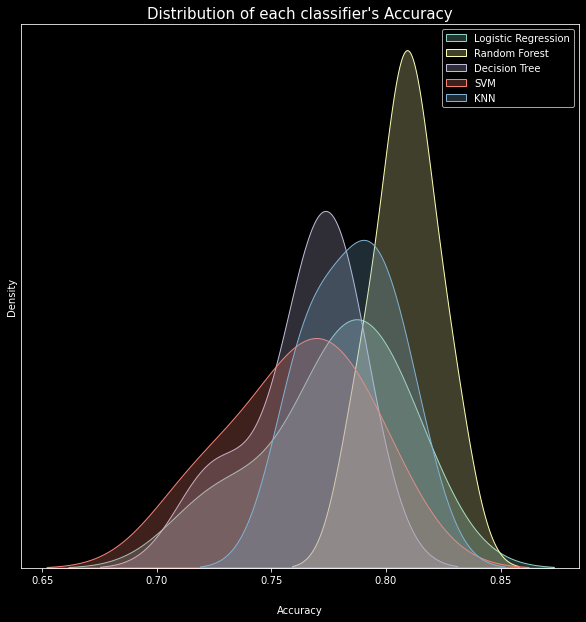

In [294]:
classifiers=['Logistic Regression', 'Random Forest', 'Decision Tree', 'SVM', 'KNN']

plt.figure(figsize=(10, 10))
for x in range(len(mean)):
    sb.kdeplot(mean[x], shade=True)
    
plt.title("Distribution of each classifier's Accuracy", fontsize=15)
plt.legend(classifiers)
plt.xlabel("Accuracy", labelpad=20)
plt.yticks([])

plt.show()

In [ ]:
# drop = ["S.No", "pred", "alive", "plod", "name", "isAlive", "DateoFdeath"]
# cols_dlt = ['actual', 'alive', 'name', 'plod', 'pred', 'isAlive', 'DateoFdeath', 'age', 'spouse', 'dateOfBirth', 'episodes', 'S.No']

# preds_partial = preds[['S.No',
#                       'male',
#                       'dateOfBirth',
#                       'book1',
#                       'book4',
#                       'numDeadRelations',
#                       'boolDeadRelations',
#                       'popularity',
#                       'showOnly',
#                       'houseDeathRate']]

In [ ]:

char1 = char_pred.copy()
# Factorize our categorical features
char1.loc[:, "title"] = pd.factorize(char1["title"])[0]

# char1.loc[:, "culture"] = pd.factorize(char1["culture"])[0]
# char1.loc[:, "mother"] = pd.factorize(char1["mother"])[0]
# char1.loc[:, "father"] = pd.factorize(char1["father"])[0]
# char1.loc[:, "heir"] = pd.factorize(char1["heir"])[0]
# char1.loc[:, "house"] = pd.factorize(char1["house"])[0]
# char1.loc[:, "spouse"] = pd.factorize(char1["spouse"])[0]
char1

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,-1,1,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,Walder Frey,0,1,Rivermen,208.0,NaN,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,Addison Hill,1,1,NaN,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0,0,0.076,0.924,Aemma Arryn,2,0,NaN,82.0,105.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,1,1,0.617,0.383,Sylva Santagar,3,0,Dornish,276.0,NaN,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,1942,0,1,0.803,0.197,Luwin,-1,1,Westeros,NaN,299.0,NaN,NaN,NaN,House Stark,NaN,1,1,1,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0,1,0.351171,0
1942,1943,0,1,0.987,0.013,Reek,-1,1,NaN,NaN,299.0,NaN,NaN,NaN,House Bolton,NaN,0,1,0,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0,0,0.096990,0
1943,1944,1,1,0.520,0.480,Symeon Star-Eyes,-1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0,0,0.030100,1
1944,1945,1,1,0.637,0.363,Coldhands,-1,1,NaN,NaN,NaN,NaN,NaN,NaN,Three-eyed crow,NaN,0,0,1,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0,0,0.130435,1
